# EXAMINATION OF VEHICLE EMISSIONS (Data Modeling and Analysis)

This notebooK imports relavant data from the ev_and_ice_vehicle_datasets.ipynb to support data analysis

## LIBRARY IMPORTS

In [460]:
# Supports dataframes and data anlysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [461]:
# Supports machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.ensemble import RandomForestRegressor

In [462]:
# Note must install prophet using "pip install prophet" 
#From fbprophet import Prophet

In [463]:
# Supports model evaluation
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics  import balanced_accuracy_score
from sklearn.metrics import roc_auc_score

In [464]:
# Included to ignore any warning dialoge generated
import warnings
warnings.filterwarnings('ignore')

## DATASETS IMPORTS
GENERAL VEHICLE DATAFRAMES
* **total_veh_sales_US** - total monthly US vehicle sales (thousand units) from 1978 through 2023
* **annual_veh_sales** - total annual US vehicle sales (thousand units) from 1978 through 2023
* **vehicle_emission_standards** - ice fuel efficency standards (mpg) from 1978 through 2031
* **emissions_by_class** - real-world ice fuel efficiency (mpg) and emissions (CO2 g/mi) for all light weight vehicles from 1975 to 2023
* **emissions_and_stds_by_class** - combines real-world emissions by class from 1975 to 2023 with emission standards by class from 2024 to 2031


ELECTRIC VEHICLE DATAFRAMES
* **BEV_PHEV_stock** - global stock (millons of units) of BEV and PHEVs by country from 2013 through 2023
* **global_EV_sales** - global sales (millons of units) of all EV sales by country from 2012 through Q1 2024
* **ev_outlook_US_hist** - historic EV/BEV/PHEV share (%) sales and stock (millions of units) from 2010 through 2023
* **ev_outlook_US_proj_STEPS** - historic and projected EV/BEV/PHEV share (%) sales and stock (millions of units) based on stated policies from 2010 through 2035
* **ev_outlook_US_proj_APS** - historic and projected EV/BEV/PHEV share (%) sales and stock (millions of units) based on announced pledges from 2020 through 2035
* **veh_lifecycle_GHG** - estimated lifecycle emissions (tons CO2e/vehicle) for a BEV and ICE vehicle


ELECTRICITY DATAFRAMES
* **net_generation** - net electricity generation (thousand MWh) for all sectors energy in US from 2010 to 2023
* **sector_elec_consumption** - electricity consumption for all energy sectors in US from 2010 to 2023\


US GHG DATAFRAMES
* **emissions_by_econ_sector** - ice fuel effciency standards from 1978 through 2031
* **avoided_emissions_2035_proj** - projected net avoided vehicle lifecycle emission (mmt CO2e) based on stated policies, announced pledges and net zero emission scenarios from 2023 to 2035
* **share_avoided_emissions_2035_proj** - projected share of net avoided vehicle lifecycle emission (%) by EV type based on stated policies, announced pledges and net zero emission scenarios from 2023 to 2035
* **lifecycle_GHG_2023_2035** - lifecycle emissions (t CO2e/vehicle) by powertrain\

In [465]:
# Supports accessing the variables and dataframes in this notebook from another notebook
import os
from datetime import datetime, timedelta

# Runs the code in ev_and_ice_vehicle_datasets.ipynb making its variables and dataframes available in this notebook
%run ev_and_ice_vehicle_datasets.ipynb

'annual_veh_sales_SA (million units, 1976 to 2023)'

,DATE,Total Vehicle Sales,Light Veh,Light Veh - Car,Light Veh - Truck,Heavy Veh,Light Veh Share - Car (%),Light Veh Share - Truck (%)
0,1976,159.479,155.593,119.932,35.661,3.886,0.770806,0.229194
1,1977,178.370,173.829,132.551,41.278,4.541,0.762537,0.237463
2,1978,184.958,179.674,133.967,45.707,5.284,0.745611,0.254389
3,1979,169.898,165.216,126.706,38.510,4.682,0.766911,0.233089
4,1980,137.563,134.309,107.782,26.527,3.254,0.802493,0.197507


'vehicle_emission_standards (mpg, 1978 to 2031)'

,Model Year,Passenger Cars,Light-Duty Trucks
0,1978,18.0,0.0
1,1979,19.0,0.0
2,1980,20.0,0.0
3,1981,22.0,0.0
4,1982,24.0,17.5


'emissions_and_stds_by_class (MPG, CO2 g/mi)'

'real-world emissions from 1975 to 2023 and future emissions standards from 2024 to 2031'

,Model Year,MPG (all),CO2 (g/mi) (all),MPG (car),CO2 (g/mi) (car),MPG (light truck),CO2 (g/mi) (light truck)
0,1975,13.06,680.60,12.68,706.54,11.42,779.08
1,1976,14.22,625.02,13.44,678.64,12.06,737.31
2,1977,15.07,590.00,14.45,623.76,13.05,681.63
3,1978,15.84,561.62,15.15,605.96,12.66,703.38
4,1979,15.91,559.69,16.25,552.04,11.94,750.80


'BEV_PHEV_stock (millions of units), 2013 to 2023'

,Year,China BEV,China PHEV,Europe BEV,Europe PHEV,United States BEV,United States PHEV,Rest of the world BEV,Rest of the world PHEV
0,2013,0.0,0.0,0.1,0.0,0.1,0.1,0.1,0.0
1,2014,0.1,0.0,0.1,0.1,0.1,0.2,0.1,0.0
2,2015,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.1
3,2016,0.5,0.2,0.3,0.3,0.3,0.3,0.1,0.1
4,2017,0.9,0.3,0.4,0.4,0.4,0.4,0.2,0.1


'global_EV_sales (millions of units), 2012 to Q1 2024'

,Year,China,Europe,United States,Rest of the world
0,2012,0.0,0.0,0.1,0.0
1,2013,0.0,0.1,0.1,0.0
2,2014,0.1,0.1,0.1,0.0
3,2015,0.2,0.2,0.1,0.0
4,2016,0.3,0.2,0.2,0.0


'ev_outlook_US_hist (millions of units, %), 2011 to 2035'

,region,category,parameter,mode,powertrain,year,unit,value
0,USA,Historical,EV sales,Cars,BEV,2010,Vehicles,1200.00000
1,USA,Historical,EV stock,Cars,BEV,2010,Vehicles,3800.00000
2,USA,Historical,Oil displacement Mbd,Cars,EV,2010,Milion barrels per day,0.00016
3,USA,Historical,"Oil displacement, million lge",Cars,EV,2010,"Oil displacement, million lge",9.40000
4,USA,Historical,Electricity demand,Cars,EV,2010,GWh,96.00000
...,...,...,...,...,...,...,...,...
139,USA,Historical,EV sales,Cars,FCEV,2023,Vehicles,3000.00000
140,USA,Historical,EV stock,Cars,FCEV,2023,Vehicles,18000.00000
141,USA,Historical,EV sales,Cars,PHEV,2023,Vehicles,290000.00000
142,USA,Historical,"Oil displacement, million lge",Cars,EV,2023,"Oil displacement, million lge",9700.00000


'ev_outlook_US_proj_STEPS (millions of units, %), 2011 to 2035'

,region,category,parameter,mode,powertrain,year,unit,value
0,USA,Projection-STEPS,Oil displacement Mbd,Cars,EV,2020,Milion barrels per day,0.043
1,USA,Projection-STEPS,"Oil displacement, million lge",Cars,EV,2020,"Oil displacement, million lge",2500.000
2,USA,Projection-STEPS,Electricity demand,Cars,EV,2020,GWh,5400.000
3,USA,Projection-STEPS,EV sales,Cars,BEV,2020,Vehicles,230000.000
4,USA,Projection-STEPS,EV stock,Cars,BEV,2020,Vehicles,1100000.000
...,...,...,...,...,...,...,...,...
72,USA,Projection-STEPS,Oil displacement Mbd,Cars,EV,2035,Milion barrels per day,2.500
73,USA,Projection-STEPS,"Oil displacement, million lge",Cars,EV,2035,"Oil displacement, million lge",140000.000
74,USA,Projection-STEPS,Electricity demand,Cars,EV,2035,GWh,460000.000
75,USA,Projection-STEPS,EV stock share,Cars,EV,2035,percent,36.000


'ev_outlook_US_proj_APS (millions of units, %), 2011 to 2035'

,region,category,parameter,mode,powertrain,year,unit,value
0,USA,Projection-APS,EV sales,Cars,BEV,2020,Vehicles,230000.0
1,USA,Projection-APS,EV stock,Cars,BEV,2020,Vehicles,1100000.0
2,USA,Projection-APS,EV sales,Cars,FCEV,2020,Vehicles,1200.0
3,USA,Projection-APS,EV stock,Cars,FCEV,2020,Vehicles,9200.0
4,USA,Projection-APS,EV sales,Cars,PHEV,2020,Vehicles,64000.0
...,...,...,...,...,...,...,...,...
72,USA,Projection-APS,EV stock,Cars,BEV,2035,Vehicles,76000000.0
73,USA,Projection-APS,EV stock,Cars,FCEV,2035,Vehicles,130000.0
74,USA,Projection-APS,EV stock,Cars,PHEV,2035,Vehicles,14000000.0
75,USA,Projection-APS,Oil displacement Mbd,Cars,EV,2035,Milion barrels per day,2.0


'BEV_and_ICE_lifecycle_GHG (tCO2e per vehicle)'

,Vehicle Type,Vehicle manufacturing,Batteries-assembly and other,Batteries-minerals,Electricity,Fuel cycle (well-to-wheel),Unnamed: 6
0,Battery electric vehicle - Base case,5.4,1.20,1.40,11.7,0.0,NaN
1,Battery electric vehicle - High-GHG minerals ...,5.4,1.20,2.80,11.7,0.0,NaN
2,Internal combustion engine vehicle,6.0,0.01,0.03,0.0,35.9,NaN


'net_generation (thousand MWh), 2010 to 2023'

,year,all fuels (utility-scale),coal,petroleum liquids,petroleum coke,...,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic,all utility-scale solar
1,2010,4125060,1847290,23337,13724,...,-5501,12855,--,--,1212
2,2011,4100141,1733430,16086,14096,...,-6421,14154,--,--,1818
3,2012,4047765,1514043,13403,9787,...,-4950,13787,--,--,4327
4,2013,4065964,1581115,13820,13344,...,-4681,13588,--,--,9036
5,2014,4093564.0,1581710.0,18276.0,11955.0,...,-6174.0,13393.0,28924.0,11233.0,17691.0


'sector_elec_consumption (thousand tons coal, thousand barrels liquid, thousand tons coke, thousand Mcf NG), 2010 to 2023'

,year,coal,petroleum liquids,petroleum coke,natural gas
1,2010,979684.0,40103.0,4994.0,7680185.0
2,2011,934938.0,27326.0,5012.0,7883865.0
3,2012,825734.0,22604.0,3675.0,9484710.0
4,2013,860729.0,23231.0,4852.0,8596299.0
5,2014,853634.0,31531.0,4412.0,8544387.0


'emissions_by_econ_sector (MMT CO2e), 1990 to 2022'

,Year,Transportation,Electricity Generation,Industry,Agriculture,Commercial,Residential,Total
0,1990,1521.4,1880.2,1723.3,595.9,447.0,345.6,6513.5
1,1991,1474.8,1874.4,1702.9,587.4,454.5,355.3,6449.2
2,1992,1533.8,1889.6,1729.3,587.5,450.0,361.8,6552.0
3,1993,1570.2,1965.0,1701.0,608.7,443.1,373.1,6661.2
4,1994,1624.5,1989.6,1719.7,612.2,446.1,363.8,6755.8


'avoided_emissions_2035_proj (MMT CO2e), 2023 to 2035'

,Year,STEPS,APS,NZE
0,2023,-130,-130,-120
1,2024,-180,-180,-200
2,2025,-240,-250,-310
3,2026,-320,-330,-440
4,2027,-420,-430,-600


'lifecycle_GHG_2023_2035 (t CO2e per vehicle), 2023 to 2035'

,Powertrain Type,Car production,Battery production,Well-to-tank,Tank-to-wheel,Grid decarbonisation impact
0,ICEV,3.7,0.0,11.5,30.9,0.0
1,HEV,3.7,0.1,9.8,26.3,0.0
2,PHEV,4.4,1.3,11.7,15.8,1.9
3,BEV,3.3,5.3,14.5,0.0,4.8
4,ICEV,3.7,0.0,8.1,26.4,0.0


In [466]:
# Added to show all columns in df display
pd.options.display.max_columns = 25 

## VEHICLE SALES AND STOCK PREDICTIONS

### Predicting Light Weight Vehicle Sales From Historic Sales Data
_Uses **Linear Regression Model** to predict car and light truck sales using 1975 to 2022 sales.\
We use 2023 data as a test and predict sales values by class (car, light truck) in 2030, 2035, 2040, 2045 and 2050_

Mean squared error: 556.3055577309258
R-squared score: -0.18961430534076817


'\nPredicted Total Vehicle, Light Car and Light Truck Salesin the US:'

,Year,Predicted Total Vehicle Sales,Predicted Car Sales,Predicted Light Truck Sales
0,2035,193.603238,38.144415,164.222438
1,2040,196.337385,30.177499,175.696866
2,2045,199.071532,22.210583,187.171294
3,2050,201.805679,14.243667,198.645722


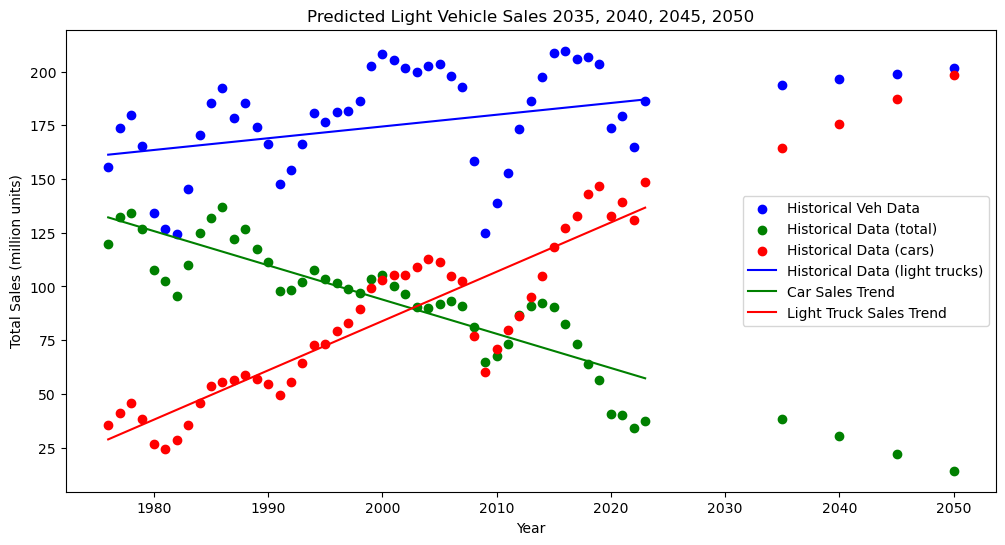

In [467]:
# Prepare the data (Annual vehicle sales)
X = annual_veh_sales_SA[['DATE']]
y = annual_veh_sales_SA['Light Veh'].values
y_lt_car = annual_veh_sales_SA['Light Veh - Car'].values
y_lt_truck = annual_veh_sales_SA['Light Veh - Truck'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model/Fit
model = LinearRegression()
model.fit(X_train, y_train)

model_lt_car = LinearRegression()
model_lt_truck = LinearRegression()

model_lt_car.fit(X, y_lt_car)
model_lt_truck.fit(X, y_lt_truck)

# Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error: {mse}")
print(f"R-squared score: {r2}")

# Predict (Annual vehicle sales in 2035, 2040, 2045, 2050)
future_years = np.array([2035, 2040, 2045, 2050]).reshape(-1, 1)
future_predictions = model.predict(future_years)
predicted_lt_car = model_lt_car.predict(future_years)
predicted_lt_truck = model_lt_truck.predict(future_years)

veh_sales_prediction = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Total Vehicle Sales': future_predictions,
    'Predicted Car Sales': predicted_lt_car,
    'Predicted Light Truck Sales': predicted_lt_truck
})


    
display("\nPredicted Total Vehicle, Light Car and Light Truck Salesin the US:")
display(veh_sales_prediction)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X, y, color='blue', label='Historical Veh Data')
plt.scatter(X, y_lt_car, color='green', label='Historical Data (total)')
plt.scatter(X, y_lt_truck, color='red', label='Historical Data (cars)')
plt.plot(X, model.predict(X), color='blue', label='Historical Data (light trucks)')
plt.plot(X, model_lt_car.predict(X), color='green', label='Car Sales Trend')
plt.plot(X, model_lt_truck.predict(X), color='red', label='Light Truck Sales Trend')
plt.scatter(future_years, future_predictions, color='blue')
plt.scatter(future_years, predicted_lt_car, color='green')
plt.scatter(future_years, predicted_lt_truck, color='red')
plt.xlabel('Year')
plt.ylabel('Total Sales (million units)')
plt.title('Predicted Light Vehicle Sales 2035, 2040, 2045, 2050')
plt.legend()
plt.show()

**OBSERVATION** \
Prediction shows that an increasing share of light vehicle sales will be light trucks indicating that the Truck Class will be the predominate future emissions standard for light duty vehicles

### Consolidating Clean EV Sales and Stock Datasets
_Combines historic and predicted total sales, BEV and PHEV vehicle sales data with historic and forecasted EV sales and stock data_

In [468]:
# VEHICLE DATASETS TO BE JOINED

# Creates Light Duty Vehicle historical sales and share of sales
hist_sales = annual_veh_sales_SA.copy()

hist_sales.rename(columns={
    'DATE': 'Year', 
    'Light Veh': 'Total Light Veh Sales',
    'Light Veh - Car': 'Car Sales',
    'Light Veh - Truck': 'Truck Sales',
    'Light Veh Share - Car (%)': 'Car Sales Share (%)',
    'Light Veh Share - Truck (%)': 'Truck Sales Share (%)'
}, inplace=True)

hist_sales.drop(columns=['Total Vehicle Sales', 'Heavy Veh'], axis=1, inplace=True)


# Creates Light Duty Vehicle predicted sales and share of sales
veh_sales_prediction['Car Sales Share (%)'] = veh_sales_prediction['Predicted Car Sales']/veh_sales_prediction['Predicted Total Vehicle Sales'] 
veh_sales_prediction['Truck Sales Share (%)'] = veh_sales_prediction['Predicted Light Truck Sales']/veh_sales_prediction['Predicted Total Vehicle Sales']

pred_sales = veh_sales_prediction.copy()

pred_sales.rename(columns={'Predicted Total Vehicle Sales':'Total Light Veh Sales',
                                                 'Predicted Car Sales':'Car Sales',
                                                 'Predicted Light Truck Sales':'Truck Sales',
                                                 'Light Veh Share - Car (%)':'Car Sales Share (%)',
                                                 'Light Veh Share - Truck (%)':'Truck Sales Share (%)'
                                                  }, inplace=True)


# Creates BEV historical stock 
veh_stock_bev = ev_outlook_US_hist[
    (ev_outlook_US_hist['parameter'] == 'EV stock') &
    (ev_outlook_US_hist['powertrain'] != 'FCEV') &
    (ev_outlook_US_hist['powertrain'] != 'PHEV')
][['year', 'powertrain', 'value']]


veh_stock_bev.drop(columns='powertrain', axis=1, inplace = True)
veh_stock_bev = veh_stock_bev.rename(columns={'year': 'Year', 'value': 'BEV Stock'})
veh_stock_bev = veh_stock_bev.reset_index(drop=True)



# Creates PHEV historical stock 
veh_stock_phev = ev_outlook_US_hist[
    (ev_outlook_US_hist['parameter'] == 'EV stock') &
    (ev_outlook_US_hist['powertrain'] != 'FCEV') &
    (ev_outlook_US_hist['powertrain'] != 'BEV')
][['year', 'powertrain', 'value']]

veh_stock_phev.drop(columns='powertrain', axis=1, inplace = True)
veh_stock_phev  = veh_stock_phev.rename(columns={'year': 'Year', 'value': 'PHEV Stock'})
veh_stock_phev  = veh_stock_phev.reset_index(drop=True)



# Creates BEV historical sales 
hist_bev_sales = ev_outlook_US_hist[
    (ev_outlook_US_hist['parameter'] == 'EV sales') &
    (ev_outlook_US_hist['powertrain'] != 'FCEV') &
    (ev_outlook_US_hist['powertrain'] != 'PHEV')
][['year', 'powertrain', 'value']]

hist_bev_sales.drop(columns='powertrain', axis=1, inplace = True)
hist_bev_sales = hist_bev_sales.rename(columns={'year': 'Year', 'value': 'BEV Sales'})
hist_bev_sales = hist_bev_sales.reset_index(drop=True)


# Creates PHEV historical sales 
hist_phev_sales = ev_outlook_US_hist[
    (ev_outlook_US_hist['parameter'] == 'EV sales') &
    (ev_outlook_US_hist['powertrain'] != 'FCEV') &
    (ev_outlook_US_hist['powertrain'] != 'BEV')
][['year', 'powertrain', 'value']]

hist_phev_sales.drop(columns='powertrain', axis=1, inplace = True)
hist_phev_sales = hist_phev_sales.rename(columns={'year': 'Year', 'value': 'PHEV Sales'})
hist_phev_sales = hist_phev_sales.reset_index(drop=True)


# Creates BEV forecasted sales (STEP)
proj_bev_sales = ev_outlook_US_proj_STEPS[
    (ev_outlook_US_proj_STEPS['parameter'] == 'EV sales') &
    (ev_outlook_US_proj_STEPS['powertrain'] != 'FCEV') &
    (ev_outlook_US_proj_STEPS['powertrain'] != 'PHEV')
][['year', 'powertrain', 'value']]

proj_bev_sales.drop(columns='powertrain', axis=1, inplace = True)
proj_bev_sales = proj_bev_sales.rename(columns={'year': 'Year', 'value': 'BEV Sales'})
proj_bev_sales = proj_bev_sales.reset_index(drop=True)


# Creates PHEV forecasted sales (STEP)
proj_phev_sales = ev_outlook_US_proj_STEPS[
    (ev_outlook_US_proj_STEPS['parameter'] == 'EV sales') &
    (ev_outlook_US_proj_STEPS['powertrain'] != 'FCEV') &
    (ev_outlook_US_proj_STEPS['powertrain'] != 'BEV')
][['year', 'powertrain', 'value']]

proj_phev_sales.drop(columns='powertrain', axis=1, inplace = True)
proj_phev_sales = proj_phev_sales.rename(columns={'year': 'Year', 'value': 'PHEV Sales'})
proj_phev_sales = proj_phev_sales.reset_index(drop=True)



### Building Total Vehicle Sales and Stock Model
_Combines Total Sales and consolidated EV data to calculate ICE sales and vehicle stocks over time. \
Historic ICE stock in 1975 was approximately 107 million units.\
Documentation available at: https://www.fhwa.dot.gov/ohim/summary95/mv200.pdf_

In [472]:
# JOINING TOTAL AND EV DATA TO CALCULATE ICE SALES AND STOCK DATA

# ICE stock in 1975 was approximately 107 million accournding to the US Federal Highway Adminstration.
Initial_ICE_stock = 107

# Combines historic and projected sales data into single set of dataframes
veh_sales = pd.concat([hist_sales, pred_sales], axis=0, ignore_index=True)
veh_sales_bev= pd.concat([hist_bev_sales, proj_bev_sales], axis=0, ignore_index=True)
veh_sales_phev = pd.concat([hist_phev_sales, proj_phev_sales], axis=0, ignore_index=True)

vehicle_data = (veh_sales
                .merge(veh_stock_bev, on='Year', how='left')
                .merge(veh_sales_bev, on='Year', how='left')
                .merge(veh_stock_phev, on='Year', how='left')
                .merge(veh_sales_phev, on='Year', how='left')
                     )

vehicle_data.fillna(0, inplace = True)

# Sets sales and stock to million units to align with 'Total Vehicle Sales' data
adjusted_col = ['BEV Stock','BEV Sales', 'PHEV Stock', 'PHEV Sales']
vehicle_data[adjusted_col] = vehicle_data[adjusted_col]/1000000

#Assumes Announced Pledges Scenario
vehicle_data['Total EV Sales'] = vehicle_data['BEV Sales'] + vehicle_data['PHEV Sales']
vehicle_data['ICE Sales'] = vehicle_data['Total Light Veh Sales'] - vehicle_data['Total EV Sales']

# Assumes vehicles are retired after 16 years
vehicle_data['BEV Retirements'] = vehicle_data['BEV Sales'].shift(16).fillna(0)
vehicle_data['PHEV Retirements'] = vehicle_data['PHEV Sales'].shift(16).fillna(0)
vehicle_data['ICE Retirements'] = vehicle_data['ICE Sales'].shift(16).fillna(0)


vehicle_data['BEV Stock'] = vehicle_data['BEV Sales'] + vehicle_data['BEV Stock'] - vehicle_data['BEV Retirements']
vehicle_data['PHEV Stock'] = vehicle_data['PHEV Sales'] + vehicle_data['PHEV Stock']- vehicle_data['PHEV Retirements']
vehicle_data['Total EV Stock'] = vehicle_data['BEV Stock'] + vehicle_data['PHEV Stock']
vehicle_data['ICE Stock'] = vehicle_data['ICE Sales'] - vehicle_data['ICE Retirements']
vehicle_data['Total Light Veh Stock'] = vehicle_data['Total EV Stock'] + vehicle_data['ICE Stock']


display ('ALL Projections')
display (vehicle_data.head(25))


'ALL Projections'

,Year,Total Light Veh Sales,Car Sales,Truck Sales,Car Sales Share (%),Truck Sales Share (%),BEV Stock,BEV Sales,PHEV Stock,PHEV Sales,Total EV Sales,ICE Sales,BEV Retiremenents,PHEV Retiremenents,ICE Retiremenents,Total EV Stock,ICE Stock,Total Light Veh Stock
0,1976,155.593,119.932,35.661,0.770806,0.229194,0.0,0.0,0.0,0.0,0.0,155.593,0.0,0.0,0.000,0.0,155.593,155.593
1,1977,173.829,132.551,41.278,0.762537,0.237463,0.0,0.0,0.0,0.0,0.0,173.829,0.0,0.0,0.000,0.0,173.829,173.829
2,1978,179.674,133.967,45.707,0.745611,0.254389,0.0,0.0,0.0,0.0,0.0,179.674,0.0,0.0,0.000,0.0,179.674,179.674
3,1979,165.216,126.706,38.510,0.766911,0.233089,0.0,0.0,0.0,0.0,0.0,165.216,0.0,0.0,0.000,0.0,165.216,165.216
4,1980,134.309,107.782,26.527,0.802493,0.197507,0.0,0.0,0.0,0.0,0.0,134.309,0.0,0.0,0.000,0.0,134.309,134.309
5,1981,126.768,102.413,24.355,0.807877,0.192123,0.0,0.0,0.0,0.0,0.0,126.768,0.0,0.0,0.000,0.0,126.768,126.768
6,1982,124.360,95.754,28.606,0.769974,0.230026,0.0,0.0,0.0,0.0,0.0,124.360,0.0,0.0,0.000,0.0,124.360,124.360
7,1983,145.437,110.145,35.292,0.757338,0.242662,0.0,0.0,0.0,0.0,0.0,145.437,0.0,0.0,0.000,0.0,145.437,145.437
8,1984,170.367,124.682,45.685,0.731844,0.268156,0.0,0.0,0.0,0.0,0.0,170.367,0.0,0.0,0.000,0.0,170.367,170.367
9,1985,185.311,131.738,53.573,0.710902,0.289098,0.0,0.0,0.0,0.0,0.0,185.311,0.0,0.0,0.000,0.0,185.311,185.311


**ICE Vehicle Predicted Fuel Efficiency**

**NOTES (to do)**

1) To get to per vehicle emissions prediction, need to incorporate annual MPG standards data (vehicle_emission_standards) by class after 2023 and then predict Real World CO2 by class (emissions_by_class)
2) Need to apply to forecasted vehicle sales to get emission contributions from ICE

In [470]:
# Prepare the data
emissions_and_stds_by_class['Model Year'] = emissions_and_stds_by_class['Model Year'].astype(int)
all_mpg = emissions_and_stds_by_class[['Model Year', 'MPG (all)', 'CO2 (g/mi) (car)', 'CO2 (g/mi) (light truck)']].copy()
all_mpg = all_mpg[all_mpg['Model Year'] <= 2023]  # Use data up to 2023 for training

# Split the data
X = all_mpg[['Model Year', 'CO2 (g/mi) (car)', 'CO2 (g/mi) (light truck)']]
y = all_mpg['MPG (all)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Create future dataframe for prediction
future_years = range(2024, 2032)
future_mpg = pd.DataFrame({'Model Year': future_years})

# Add CO2 values for 2024-2031 (you need to provide these values)
# For this example, I'm using the last known values, but you should replace these with your projections
future_mpg['CO2 (g/mi) (car)'] = all_mpg['CO2 (g/mi) (car)'].iloc[-1]
future_mpg['CO2 (g/mi) (light truck)'] = all_mpg['CO2 (g/mi) (light truck)'].iloc[-1]

# Make predictions
future_mpg['MPG (all)'] = model.predict(future_mpg)

# Print the predictions
display(future_mpg)

# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(all_mpg['Model Year'], all_mpg['MPG (all)'], label='Historical Data')
plt.plot(future_mpg['Model Year'], future_mpg['Predicted MPG (all)'], color='red', label='Predictions')
plt.title('MPG (all) Forecast')
plt.xlabel('Year')
plt.ylabel('MPG (all)')
plt.legend()
plt.show()

# Combine historical data with predictions
#mpg_data = pd.concat(
    [all_mpg[['Model Year', 'MPG (all)']],
    future_mpg[['Model Year', 'MPG (all)']]],
    axis=0, ignore_index=True)

display(mpg_data)

IndentationError: unexpected indent (3792200518.py, line 49)

**Total ICE Vehicle Predicted GHG Emissions**

In [ ]:
# Need to factor updated per vehicle emissions and vehicle sales predictions

## ELECTRIC VEHICLE EMISSIONS CONTRIBUTION

**EV Predicted Sales**

**Electricity Generation Predicted GHG**

**EV Predicted GHG Emissions**